In [ ]:
!pip install accelerate

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import matplotlib
import math
from accelerate import Accelerator
import matplotlib.ticker as ticker
import math
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [2]:
z = torch.zeros(6, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones((6, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [4]:
torch.manual_seed(1729)
r1 = torch.rand(3, 3)
print('A random tensor:')
print(r1)

r2 = torch.rand(3, 3)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(3, 3)
print('\nSame as r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162]])

A different random tensor:
tensor([[0.9927, 0.4128, 0.5938],
        [0.6128, 0.1519, 0.0453],
        [0.5035, 0.9978, 0.3884]])

Same as r1:
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162]])


In [5]:
ones = torch.ones(3, 3)
print(ones)

twos = torch.ones(3, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(3, 3)
r2 = torch.rand(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
torch.Size([3, 3])


In [6]:
r = (torch.rand(3, 3) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.4587, -0.1770,  0.3677],
        [-0.8595,  0.0210,  0.8901],
        [-0.5283, -0.6041, -0.3345]])

Absolute value of r:
tensor([[0.4587, 0.1770, 0.3677],
        [0.8595, 0.0210, 0.8901],
        [0.5283, 0.6041, 0.3345]])

Inverse sine of r:
tensor([[-0.4765, -0.1780,  0.3766],
        [-1.0343,  0.0210,  1.0976],
        [-0.5566, -0.6487, -0.3411]])

Determinant of r:
tensor(0.0857)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.4370,  0.0914, -0.8948],
        [-0.8785, -0.2571,  0.4027],
        [-0.1933,  0.9620,  0.1927]]),
S=tensor([1.3857, 0.8597, 0.0720]),
V=tensor([[ 0.7632, -0.3829, -0.5205],
        [ 0.1268, -0.7012,  0.7016],
        [-0.6336, -0.6015, -0.4866]]))

Average and standard deviation of r:
(tensor(0.5419), tensor(-0.1870))

Maximum value of r:
tensor(0.8901)


In [7]:
 # for the activation function

In [8]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0758, -0.0739, -0.0351,  0.0660, -0.1330,  0.0200, -0.0101,  0.1234,
         -0.0051,  0.0387]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [10]:


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

horse   dog   car   dog


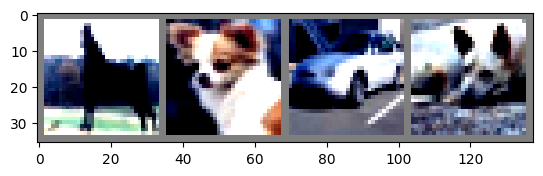

In [13]:


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


plane truck truck  bird


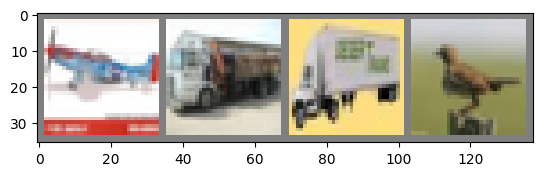

In [16]:


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.242
[1,  4000] loss: 1.902
[1,  6000] loss: 1.704
[1,  8000] loss: 1.582
[1, 10000] loss: 1.535
[1, 12000] loss: 1.475
[2,  2000] loss: 1.444
[2,  4000] loss: 1.364
[2,  6000] loss: 1.335
[2,  8000] loss: 1.331
[2, 10000] loss: 1.300
[2, 12000] loss: 1.292
[3,  2000] loss: 1.219
[3,  4000] loss: 1.238
[3,  6000] loss: 1.204
[3,  8000] loss: 1.188
[3, 10000] loss: 1.197
[3, 12000] loss: 1.178
[4,  2000] loss: 1.126
[4,  4000] loss: 1.099
[4,  6000] loss: 1.094
[4,  8000] loss: 1.110
[4, 10000] loss: 1.089
[4, 12000] loss: 1.094
[5,  2000] loss: 1.007
[5,  4000] loss: 1.058
[5,  6000] loss: 1.035
[5,  8000] loss: 1.051
[5, 10000] loss: 1.049
[5, 12000] loss: 1.026
[6,  2000] loss: 0.952
[6,  4000] loss: 0.972
[6,  6000] loss: 0.994
[6,  8000] loss: 0.965
[6, 10000] loss: 1.001
[6, 12000] loss: 0.999
[7,  2000] loss: 0.915
[7,  4000] loss: 0.923
[7,  6000] loss: 0.928
[7,  8000] loss: 0.937
[7, 10000] loss: 0.957
[7, 12000] loss: 0.935
[8,  2000] loss: 0.850
[8,  4000] 

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [22]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[1.4584e-33, 0.0000e+00, 1.4480e-33, 0.0000e+00],
        [2.3822e-44, 4.5108e-41, 2.2703e-33, 0.0000e+00],
        [1.4013e-45, 1.4013e-45, 1.4580e-33, 0.0000e+00]])


In [23]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


In [24]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


In [25]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[2.2505e-33, 0.0000e+00, 5.0447e-44],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 2.6223e-09, 5.3178e-08]]])
torch.Size([2, 2, 3])
tensor([[[1.4447e-33, 0.0000e+00, 0.0000e+00],
         [2.3510e-38, 8.3890e-38, 0.0000e+00]],

        [[1.0842e-19, 0.0000e+00, 4.7399e+16],
         [9.3233e-09, 8.0671e+17, 5.7453e-44]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


In [26]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [27]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
tensor([[ 0,  1,  5],
        [11, 11, 11]], dtype=torch.int32)


In [28]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [29]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


In [30]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.6146, 0.5999, 0.5013, 0.9397],
        [0.8656, 0.5207, 0.6865, 0.3614]])
tensor([[1.2291, 1.1998, 1.0026, 1.8793],
        [1.7312, 1.0413, 1.3730, 0.7228]])


In [31]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]]])
tensor([[[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]]])
tensor([[[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]]])


In [32]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.linalg.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.linalg.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.linalg.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.9238, 0.5724, 0.0791, 0.2629],
        [0.1986, 0.4439, 0.6434, 0.4776]])
tensor([[-0., -0., 1., -0.],
        [-0., 1., 1., -0.]])
tensor([[-1., -1.,  0., -1.],
        [-1.,  0.,  0., -1.]])
tensor([[-0.5000, -0.5000,  0.0791, -0.2629],
        [-0.1986,  0.4439,  0.5000, -0.4776]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.7375, 0.8328],
        [0.8444, 0.2941]])
tensor([[2.2125, 2.4985],
        [2.5332, 0.8822]])
torch.return_types.linalg_svd(
U=tensor([[-0.7889, -0.6145],
        [-0.6145,  0.7889]]),
S=tensor([4.1498, 1.0548]),
Vh=tensor([[-0.7957, -0.6056],
        [ 0.6056, -0.7957

In [33]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [34]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After adding:
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After multiplying
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])


In [35]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c) == old_id  # still the same object!

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3653, 0.8699],
        [0.2364, 0.3604]])
tensor([[0.0776, 0.4004],
        [0.9877, 0.0352]])


In [36]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

tensor([[  1., 561.],
        [  1.,   1.]])


In [37]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


In [38]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], grad_fn=<CloneBackward0>)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]])
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)


In [40]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


In [42]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device=torch.device('cuda'))
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 833.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [46]:


# Check if a default accelerator can be initialized
try:
    accelerator = Accelerator()  # Try to initialize an Accelerator instance
    my_device = accelerator.device  # Get the device from the instance
except Exception:  # Handle exceptions if initialization fails
    my_device = torch.device('cpu')  # Fallback to CPU

print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cpu
tensor([[0.6923, 0.7545],
        [0.7746, 0.2330]])


In [47]:
y = torch.rand(2, 2)
y = y.to(my_device)

In [48]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [49]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.1506]]]]])


In [50]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.9585, 0.7756, 0.8973, 0.4929, 0.2367, 0.8194, 0.4509, 0.2690, 0.8381,
         0.8207, 0.6818, 0.5057, 0.9335, 0.9769, 0.2792, 0.3277, 0.5210, 0.7349,
         0.7823, 0.8637]])
torch.Size([20])
tensor([0.9585, 0.7756, 0.8973, 0.4929, 0.2367, 0.8194, 0.4509, 0.2690, 0.8381,
        0.8207, 0.6818, 0.5057, 0.9335, 0.9769, 0.2792, 0.3277, 0.5210, 0.7349,
        0.7823, 0.8637])
torch.Size([2, 2])
torch.Size([2, 2])


In [51]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]],

        [[0.4887, 0.4887],
         [0.8625, 0.8625],
         [0.6191, 0.6191]]])


In [52]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [53]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


In [54]:


numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [55]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.9091, 0.5695, 0.7206],
        [0.4155, 0.0982, 0.4637]])
[[0.90905803 0.5695162  0.7206341 ]
 [0.41554475 0.09820974 0.46368068]]


In [56]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.90905803  0.5695162   0.7206341 ]
 [ 0.41554475 17.          0.46368068]]


In [57]:
# %matplotlib inline



In [58]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


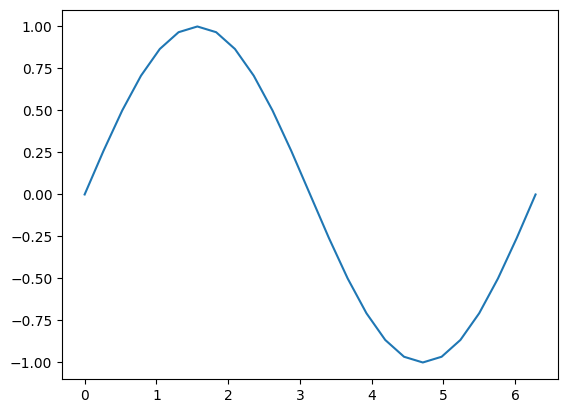

In [59]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [60]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [61]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [62]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [63]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7dbdd303f1c0>, 0), (None, 0))
((<SinBackward0 object at 0x7dbdd303cdc0>, 0), (None, 0))
((<AccumulateGrad object at 0x7dbdd303ca00>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


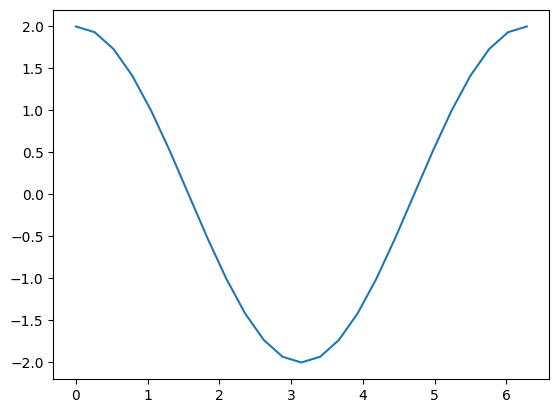

In [64]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [65]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [66]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0452, -0.0180, -0.0724, -0.0438,  0.0303,  0.0074,  0.0830, -0.0522,
        -0.0164,  0.0587], grad_fn=<SliceBackward0>)
None


In [67]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(171.5051, grad_fn=<SumBackward0>)


In [68]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0452, -0.0180, -0.0724, -0.0438,  0.0303,  0.0074,  0.0830, -0.0522,
        -0.0164,  0.0587], grad_fn=<SliceBackward0>)
tensor([ 0.6030,  0.7591, -1.4321,  7.2073, -0.1347, 11.5423, -0.8353,  6.6918,
         2.0080, -0.5037])


In [69]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0458, -0.0188, -0.0709, -0.0510,  0.0304, -0.0041,  0.0838, -0.0589,
        -0.0184,  0.0592], grad_fn=<SliceBackward0>)
tensor([ 0.6030,  0.7591, -1.4321,  7.2073, -0.1347, 11.5423, -0.8353,  6.6918,
         2.0080, -0.5037])


In [70]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([ 0.6030,  0.7591, -1.4321,  7.2073, -0.1347, 11.5423, -0.8353,  6.6918,
         2.0080, -0.5037])
tensor([  9.1205,   5.9163,  -5.7981,  31.1624,  -8.0579,  50.9305, -11.1031,
         32.1430,  19.8985, -14.2861])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [71]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [72]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [73]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [74]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.0189, 0.7381, 0.4742, 0.1523, 0.6379], requires_grad=True)
tensor([0.0189, 0.7381, 0.4742, 0.1523, 0.6379])


In [75]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        50.92%       5.493ms        50.92%       5.493ms       5.493us          1000  
    aten::div        49.08%       5.295ms        49.08%       5.295ms       5.295us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 10.788ms



In [76]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-603.9016, 1223.8287,    5.6323], grad_fn=<MulBackward0>)


In [77]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [78]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.4403]), tensor([0.1551]))


(tensor([[3.1062]]), tensor([[3.]]))

In [79]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.6458, 0.8798, 0.5767]), tensor([0.9047, 0.1792, 0.5221]))


(tensor([[3.8151, 0.0000, 0.0000],
         [0.0000, 4.8209, 0.0000],
         [0.0000, 0.0000, 3.5602]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [80]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 766.5406, -948.6783,  159.5826]),
 tensor([2.0480e+02, 2.0480e+03, 2.0480e-01]))

In [81]:


class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
Parameter containing:
tensor([[ 0.0928, -0.0327, -0.0178,  ...,  0.0397,  0.0733,  0.0139],
        [-0.0589,  0.0761,  0.0063,  ...,  0.0840, -0.0950, -0.0805],
        [-0.0296,  0.0746, -0.0094,  ..., -0.0221,  0.0286,  0.0309],
        ...,
        [ 0.0760,  0.0067,  0.0389,  ..., -0.0602, -0.0715, -0.0410],
        [ 0.0893, -0.0695, -0.0390,  ..., -0.0351, -0.0998, -0.0919],
        [-0.0477,  0.0192,  0.0410,  ...,  0.0517, -0.0792,  0.0318]],
       requires_grad=True)
Parameter containing:
tensor([-0.0220, -0.0587, -0.0317,  0.0995,  0.0630,  0.0281,  0.0676, -0.0155,
         0.0419,  0.0254,  0.0930,  0.0508,  0.0166, -0.0871, -0.0174,  0.0944,
         0.0273,  0.0831, -0.0961,  0.00

In [82]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.1614, 0.6019, 0.6300]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.1419, -0.0215,  0.2276],
        [-0.4104,  0.0179,  0.0831]], requires_grad=True)
Parameter containing:
tensor([-0.3570,  0.2265], requires_grad=True)


Output:
tensor([[-0.2037,  0.2234]], grad_fn=<AddmmBackward0>)


In [83]:



class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [84]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [85]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.0375, 0.2081, 0.2710, 0.8835, 0.6359, 0.4928],
         [0.2282, 0.8089, 0.1372, 0.2218, 0.3781, 0.8724],
         [0.0521, 0.5234, 0.2712, 0.8075, 0.6849, 0.6205],
         [0.8893, 0.3989, 0.0695, 0.6793, 0.9779, 0.7896],
         [0.1310, 0.6721, 0.1847, 0.5465, 0.4129, 0.7210],
         [0.7140, 0.5548, 0.6181, 0.5909, 0.7307, 0.3257]]])
tensor([[[0.8089, 0.8835],
         [0.8893, 0.9779]]])


In [86]:
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[ 6.2863, 13.4015, 20.0296, 23.6300],
         [16.4139,  9.4502,  6.8374, 16.7844],
         [13.7473, 14.9389, 21.4386, 14.0815],
         [ 7.7938, 18.1404, 13.3007, 19.6295]]])
tensor(14.7440)
tensor([[[-1.4420, -0.3677,  0.6331,  1.1767],
         [ 0.9337, -0.6748, -1.2782,  1.0193],
         [-0.7338, -0.3543,  1.7154, -0.6273],
         [-1.4947,  0.7394, -0.3056,  1.0610]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(-1.4901e-08, grad_fn=<MeanBackward0>)


In [87]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[1.0202, 0.0000, 0.6731, 0.8794],
         [0.0000, 0.6237, 1.5437, 0.0000],
         [0.0000, 0.0854, 0.0000, 0.4737],
         [1.6317, 1.6428, 0.0000, 0.0000]]])
tensor([[[0.0000, 0.9322, 0.0000, 0.8794],
         [0.0000, 0.0000, 1.5437, 0.9273],
         [1.1284, 0.0000, 0.0000, 0.4737],
         [1.6317, 0.0000, 0.0000, 0.0000]]])


In [88]:


# In case you are using an environment that has TensorFlow installed,
# such as Google Colab, uncomment the following code to avoid
# a bug with saving embeddings to your TensorBoard directory

# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.81MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.52MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



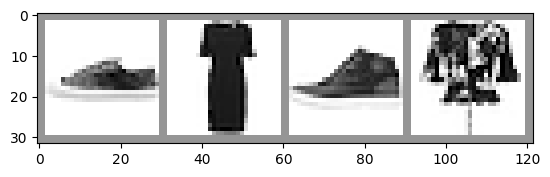

In [89]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [90]:
# Default log_dir argument is "runs" - but it's good to be specific
# torch.utils.tensorboard.SummaryWriter is imported above
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#   tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

In [91]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [92]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            net.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Switching back to training mode, eg. turning on regularisation

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


In [93]:
# Again, grab a single mini-batch of images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(net, images)
writer.flush()

In [94]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

In [95]:


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


Dress  Trouser  Sneaker  Ankle Boot


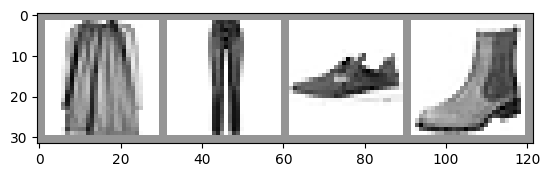

In [96]:


# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

In [97]:


# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [98]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.6826, 0.6558, 0.4899, 0.4545, 0.7950, 0.2935, 0.9709, 0.4822, 0.5561,
         0.9207],
        [0.3917, 0.9005, 0.2158, 0.4010, 0.9620, 0.1632, 0.9957, 0.9637, 0.5793,
         0.8293],
        [0.2877, 0.1448, 0.7666, 0.3868, 0.7857, 0.2107, 0.4284, 0.2114, 0.9476,
         0.2944],
        [0.5760, 0.1819, 0.4804, 0.0421, 0.7235, 0.8551, 0.0872, 0.4089, 0.4614,
         0.7571]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.4777755737304688


In [99]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [100]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [101]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 1.893813313394785
  batch 2000 loss: 0.81886772512272
  batch 3000 loss: 0.6842423586379737
  batch 4000 loss: 0.6317293733963742
  batch 5000 loss: 0.5795628398228436
  batch 6000 loss: 0.5361533946448471
  batch 7000 loss: 0.4986855810340494
  batch 8000 loss: 0.4865215842537873
  batch 9000 loss: 0.45825258453132117
  batch 10000 loss: 0.4817721103854128
  batch 11000 loss: 0.4572070299203042
  batch 12000 loss: 0.4256664691265905
  batch 13000 loss: 0.4040066037570359
  batch 14000 loss: 0.39483594560070195
  batch 15000 loss: 0.43015337020880545
LOSS train 0.43015337020880545 valid 0.4253849983215332
EPOCH 2:
  batch 1000 loss: 0.39189472076564563
  batch 2000 loss: 0.39986637991061436
  batch 3000 loss: 0.3897260727334069
  batch 4000 loss: 0.366147985379459
  batch 5000 loss: 0.3657719825867098
  batch 6000 loss: 0.3590052843274025
  batch 7000 loss: 0.3677810689170001
  batch 8000 loss: 0.3680737238996371
  batch 9000 loss: 0.3520084615771193
  batch